In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_scorebB
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = pd.read_csv('iris_csv.csv')
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data=iris.loc[(iris['class'] == 'Iris-virginica')|(iris['class']=='Iris-versicolor')]
data.head()


,sepallength,sepalwidth,petallength,petalwidth,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [4]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [5]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [6]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X)) 

In [7]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X)) 

In [40]:
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
Y=iris.target
X
Y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: [0.99941567 0.99969427 0.9996242  0.99988007] t1: [0.99657017 0.99903127 0.99841453 0.99985778] cost: [17.09799803  5.24235292  7.55250777  0.74742061]
t0: [0.9988334  0.99938886 0.99924903 0.99976016] t1: [0.99315262 0.99806355 0.99683192 0.9997156 ] cost: [16.97802652  5.23206086  7.52607784  0.74707474]
t0: [0.99825318 0.99908378 0.9988745  0.99964029] t1: [0.98974731 0.99709685 0.99525219 0.99957347] cost: [16.85891262  5.22179044  7.49974319  0.74672907]
t0: [0.99767501 0.99877903 0.9985006  0.99952044] t1: [0.98635421 0.99613117 0.99367531 0.99943138] cost: [16.7406502   5.21154161  7.47350348  0.74638359]
t0: [0.99709889 0.9984746  0.99812732 0.99940062] t1: [0.98297325 0.9951665  0.99210129 0.99928933] cost: [16.62323318  5.20131433  7.44735837  0.7460383 ]
t0: [0.99652479 0.99817049 0.99775468 0.99928084] t1: [0.97960441 0.99420284 0.99053012 0.99914733] cost: [16.50665551  5.19110855  7.42130751  0.7456932 ]
t0: [0.99595272 0.99786672 0.99738266 0.99916108] t1: [0.9762476

In [44]:
cost_function(X,Y,10,10)

array([2302.74333333,  794.30666667, 1226.32333333,  243.61666667])

In [45]:
EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

ValueError: operands could not be broadcast together with shapes (150,4) (150,) 

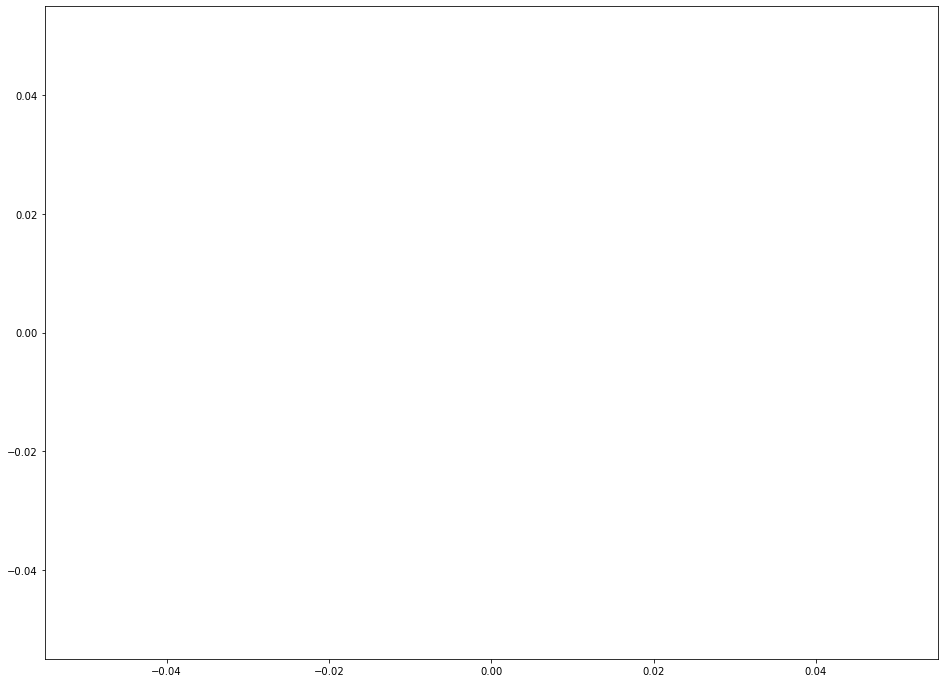

In [46]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [47]:
from matplotlib import pyplot as plt
import numpy as np
from math import ceil, floor


In [54]:
def linear_interpolation(X, idx):
    idx_min = floor(idx)
    idx_max = ceil(idx)
    if idx_min == idx_max or idx_max >= len(X):
        return X[idx_min]
    elif idx_min < 0:
        return X[idx_max]
    else:
        return X[idx_min] + (idx - idx_min)*X[idx_max]
def NM(X, gamma, lr=0.25):
    Y = []
    v = 0
    for i in range(len(X)):
        v = gamma*v + lr*(linear_interpolation(X, i+gamma*v) if i+gamma*v < len(X) else 0)
        
        Y.append(v)
    return np.asarray(Y)

def SmoothedNM(X, gamma, lr=0.25):
    Y = []
    v = 0
    for i in range(len(X)):
        lookahead4 = linear_interpolation(X, i+gamma*v/4)   if i+gamma*v/4      < len(X) else 0
        lookahead3 = linear_interpolation(X, i+gamma*v/2)   if i+gamma*v/2      < len(X) else 0
        lookahead2 = linear_interpolation(X, i+gamma*v*3/4) if i+gamma*v*3/4    < len(X) else 0
        lookahead1 = linear_interpolation(X, i+gamma*v)     if i+gamma*v        < len(X) else 0
        v = gamma*v + lr*(lookahead4 + lookahead3 + lookahead2 + lookahead1)/4
        Y.append(v)
    return np.asarray(Y)
def RMSProp(X, gamma, lr=0.25, eps=0.00001):
    Y = []
    EG = 0
    for x in X:
        EG = gamma*EG + (1-gamma)*x*x
        v = lr/np.sqrt(EG + eps)*x
        Y.append(v)
    return np.asarray(Y)


In [55]:
np.random.seed(413)
X = np.arange(0, 300)

D_Thetha_spikes = np.asarray( [int(x%60 == 0) for x in X])
D_Thetha_rectangles = np.asarray( [2*int(x%40 < 20) - 1 for x in X])
D_Thetha_noisy_sin = np.asarray( [np.sin(x/20) + np.random.random() - 0.5 for x in X])
D_Thetha_very_noisy_sin = np.asarray( [np.sin(x/20)/5 + np.random.random() - 0.5 for x in X])
D_Thetha_uneven_sawtooth = np.asarray( [ x%20/(15*int(x > 80) + 5) for x in X])
D_Thetha_saturation = np.asarray( [ int(x % 80 < 40) for x in X])

for method_label, method, parameter_step in [
                ("GRAD_Nesterov", NM, [0.25, 0.9, 0.975]),
                ("GRAD_Smoothed_Nesterov", SmoothedNM, [0.25, 0.9, 0.975]),
                ("GRAD_RMSProp", RMSProp, [0.25, 0.9, 0.975]),
                ]:
    for label, D_Thetha in [("spikes", D_Thetha_spikes),
                            ("rectangles", D_Thetha_rectangles),
                            ("noisy sin", D_Thetha_noisy_sin),
                            ("very noisy sin", D_Thetha_very_noisy_sin),
                            ("uneven sawtooth", D_Thetha_uneven_sawtooth),
                            ("saturation", D_Thetha_saturation), ]:
        fig = plt.figure(figsize=[16.0, 9.0])
        ax = fig.add_subplot(111)

        ax.plot(X, D_Thetha, label="gradient")
        for gamma in parameter_step:
            Y = method(D_Thetha, gamma)
            ax.plot(X, Y, label="param="+str(gamma))

        ax.spines['bottom'].set_position('zero')
        full_name = method_label + "_" + label

        plt.xticks(np.arange(0, 300, 20))
        plt.grid(True)
        plt.title(full_name)
        plt.xlabel('epoch')
        plt.ylabel('value')
        plt.legend()
        # plt.show(block=True) #Uncoomment and comment next line if you just want to watch
        plt.savefig(full_name)
        plt.close(fig)